In [3]:
import anndata as ad

In [4]:
fname = '/home/jupyter/__output/brca_full/cell_type/gf-6L-30M-i2048/data.h5ad'

In [5]:
adata_v1 =ad.read_h5ad(fname)

In [6]:
adata_v1

AnnData object with n_obs × n_vars = 41101 × 1713
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'ensembl_id'
    uns: 'X_name', 'hvg', 'log1p'
    obsm: 'PCA', 'UMAP', 'X_geneformer'
    layers: 'counts', 'logcounts', 'scaledata'

In [7]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/opt/miniforge3/envs/scfoundation/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


<Figure size 800x600 with 0 Axes>

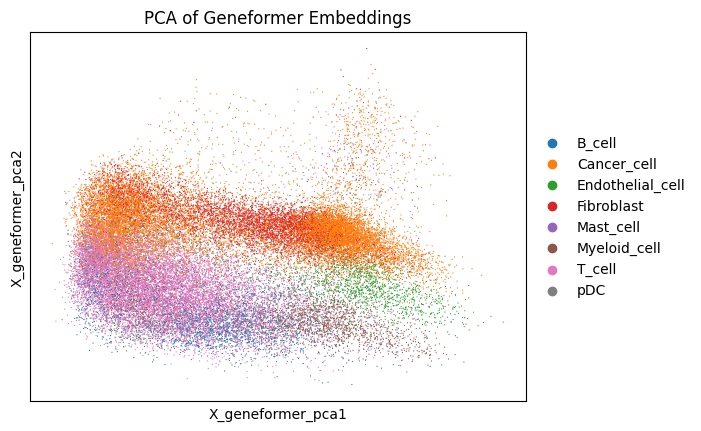

In [11]:
# Assuming adata is your AnnData object and 'X_geneformer' is stored in .obsm
X = adata_v1.obsm['X_geneformer']

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Store PCA results in adata.obsm for plotting
adata_v1.obsm['X_geneformer_pca'] = X_pca

# Plot the PCA
plt.figure(figsize=(8, 6))
sc.pl.embedding(adata_v1, basis='X_geneformer_pca', color='label', title='PCA of Geneformer Embeddings', show=True)

<Figure size 800x600 with 0 Axes>

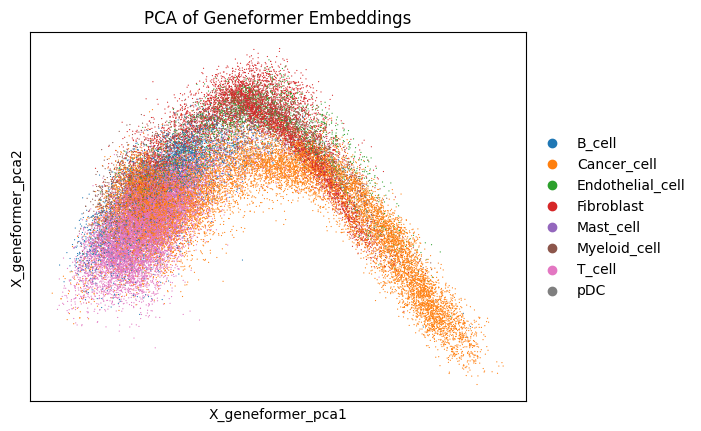

In [12]:
fname = '/home/jupyter/__output/brca_full/cell_type/Geneformer-V2-104M_continue/data.h5ad'
adata_v1_continue =ad.read_h5ad(fname)

# Assuming adata is your AnnData object and 'X_geneformer' is stored in .obsm
X = adata_v1_continue.obsm['X_geneformer']

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Store PCA results in adata.obsm for plotting
adata_v1_continue.obsm['X_geneformer_pca'] = X_pca

# Plot the PCA
plt.figure(figsize=(8, 6))
sc.pl.embedding(adata_v1_continue, basis='X_geneformer_pca', color='label', title='PCA of Geneformer Embeddings', show=True)

/opt/miniforge3/envs/scfoundation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


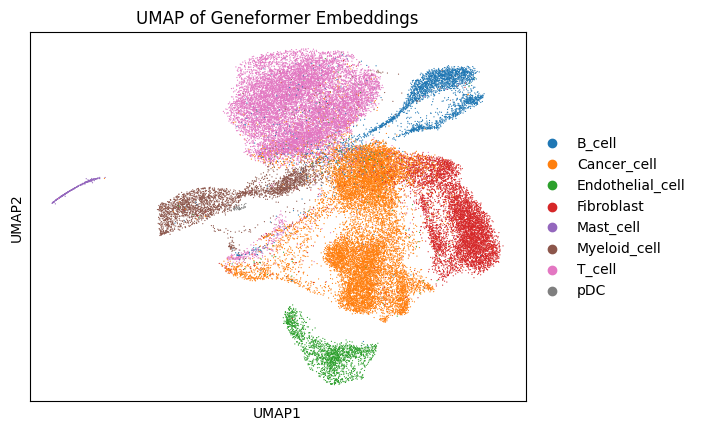

In [13]:
# Assuming adata is your AnnData object and 'X_geneformer' is in .obsm
adata = adata_v1
X = adata.obsm['X_geneformer']

# Compute neighbors based on the geneformer embedding
adata.obsm['X_geneformer'] = X  # Ensure it's set in obsm
sc.pp.neighbors(adata, use_rep='X_geneformer')  # use_rep tells scanpy to use obsm['X_geneformer']

# Compute UMAP
sc.tl.umap(adata)

# Plot the UMAP
sc.pl.umap(adata, color='label', title='UMAP of Geneformer Embeddings', show=True)

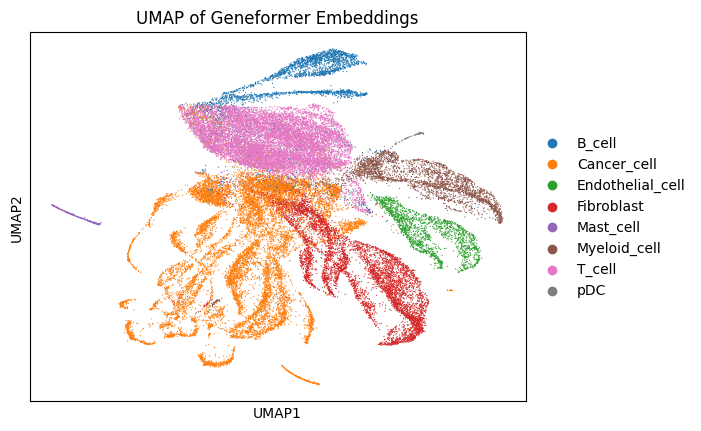

In [14]:
# Assuming adata is your AnnData object and 'X_geneformer' is in .obsm
adata = adata_v1_continue
X = adata.obsm['X_geneformer']

# Compute neighbors based on the geneformer embedding
adata.obsm['X_geneformer'] = X  # Ensure it's set in obsm
sc.pp.neighbors(adata, use_rep='X_geneformer')  # use_rep tells scanpy to use obsm['X_geneformer']

# Compute UMAP
sc.tl.umap(adata)

# Plot the UMAP
sc.pl.umap(adata, color='label', title='UMAP of Geneformer Embeddings', show=True)

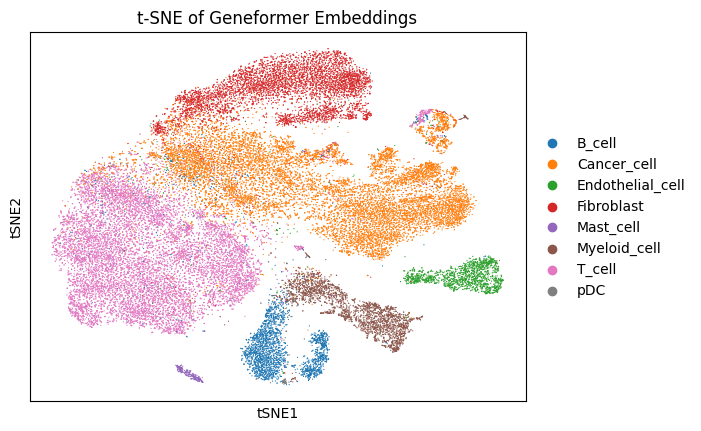

In [15]:
import scanpy as sc
import matplotlib.pyplot as plt
adata = adata_v1
# Ensure 'X_geneformer' embedding is available in obsm
X = adata.obsm['X_geneformer']

# Set up neighbors (required for t-SNE plotting in scanpy, but not used in t-SNE itself)
sc.pp.neighbors(adata, use_rep='X_geneformer')

# Compute t-SNE
sc.tl.tsne(adata, use_rep='X_geneformer')

# Plot t-SNE
sc.pl.tsne(adata, color='label', title='t-SNE of Geneformer Embeddings', show=True)

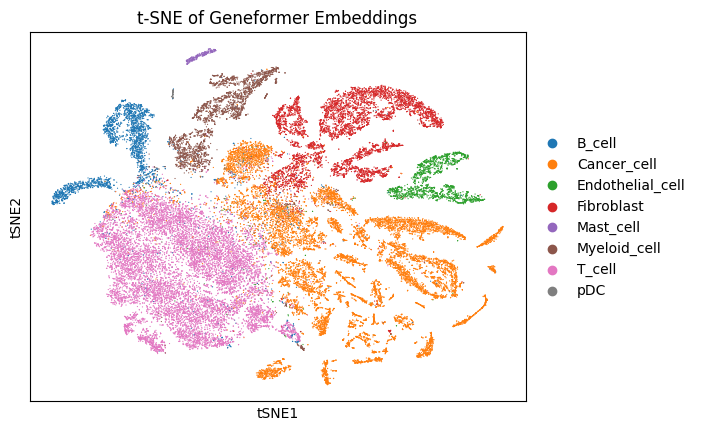

In [16]:
adata = adata_v1_continue
# Ensure 'X_geneformer' embedding is available in obsm
X = adata.obsm['X_geneformer']

# Set up neighbors (required for t-SNE plotting in scanpy, but not used in t-SNE itself)
sc.pp.neighbors(adata, use_rep='X_geneformer')

# Compute t-SNE
sc.tl.tsne(adata, use_rep='X_geneformer')

# Plot t-SNE
sc.pl.tsne(adata, color='label', title='t-SNE of Geneformer Embeddings', show=True)

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Use adata_v1 as the main object
adata = adata_v1

# Ensure t-SNE is computed on the desired embedding
sc.pp.neighbors(adata, use_rep='X_geneformer')
sc.tl.tsne(adata, use_rep='X_geneformer')
tsne = adata.obsm['X_tsne']
labels = adata.obs['label']

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Unique labels and colormap
unique_labels = labels.unique()
palette = dict(zip(unique_labels, plt.cm.tab10.colors[:len(unique_labels)]))

# Plot in both axes
for ax, title in zip(axes, ['Plot 1', 'Plot 2']):
    for label in unique_labels:
        idx = labels == label
        ax.scatter(tsne[idx, 0], tsne[idx, 1], label=label, alpha=0.7, s=20, c=[palette[label]])
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

# Create one legend outside the plots
fig.legend(unique_labels, loc='lower center', ncol=len(unique_labels), bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make space for the legend
plt.show()

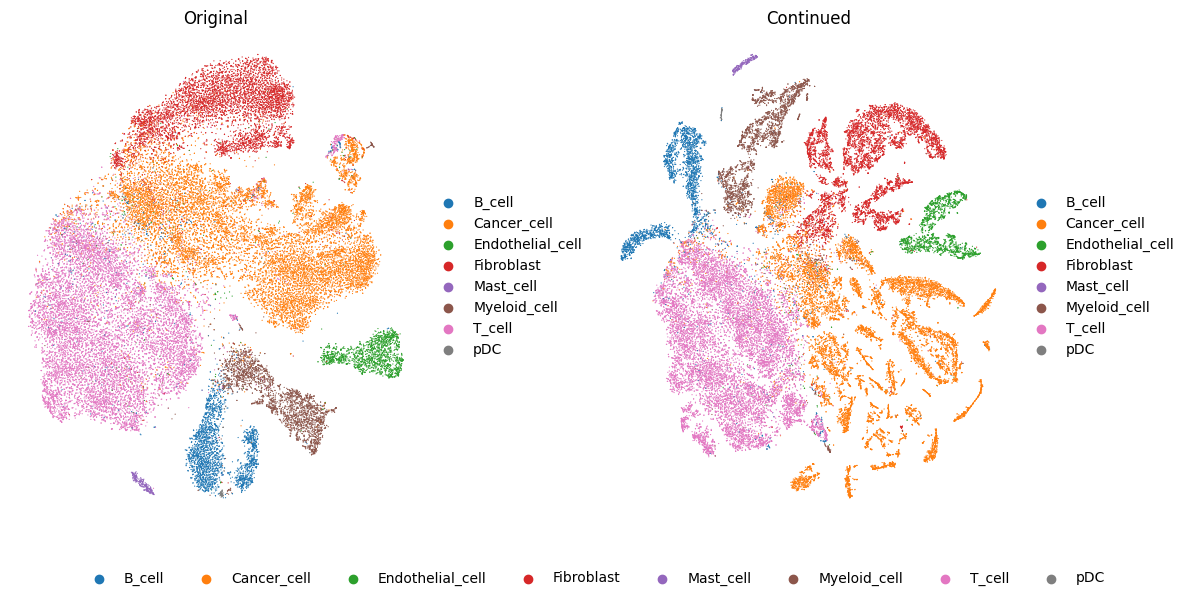

In [17]:
import scanpy as sc
import matplotlib.pyplot as plt

# Prepare both datasets
adatas = []
titles = ['Original', 'Continued']
datasets = [adata_v1, adata_v1_continue]

for ad in datasets:
    sc.pp.neighbors(ad, use_rep='X_geneformer')
    sc.tl.tsne(ad, use_rep='X_geneformer')
    adatas.append(ad)

# Plot both t-SNEs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = adatas[0].uns['label_colors'] if 'label_colors' in adatas[0].uns else None

for ax, ad, title in zip(axes, adatas, titles):
    sc.pl.tsne(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Remove bounding box from each subplot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single legend outside the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

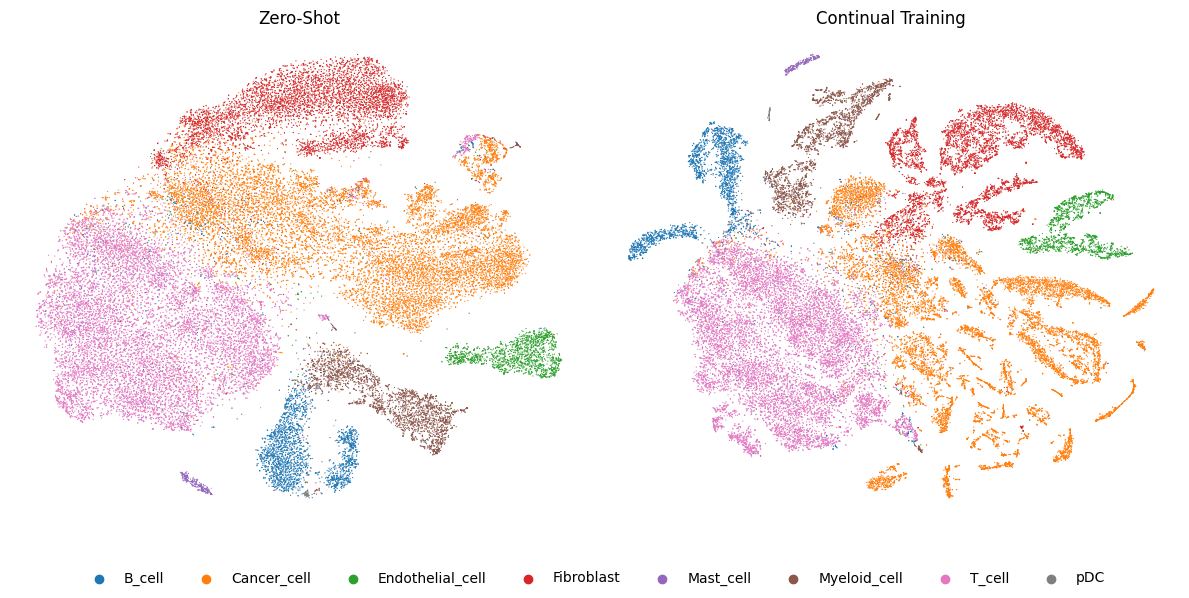

In [21]:
import scanpy as sc
import matplotlib.pyplot as plt

# Compute t-SNE for both datasets
datasets = [adata_v1, adata_v1_continue]
titles = ['Zero-Shot', 'Continual Training']

for ad in datasets:
    sc.pp.neighbors(ad, use_rep='X_geneformer')
    sc.tl.tsne(ad, use_rep='X_geneformer')

# Create the side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.tsne(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
plt.savefig('tsne.png', dpi=100)
plt.show()

In [19]:
plt.savefig('tsne.png', dpi=100)

<Figure size 640x480 with 0 Axes>

## UMAP

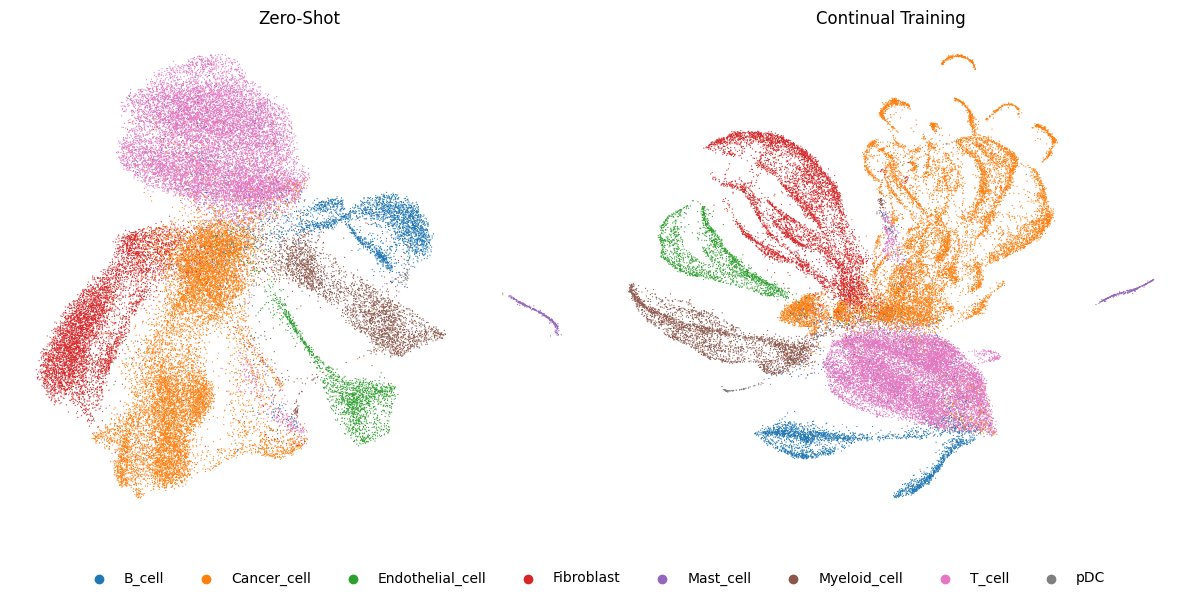

In [25]:
import scanpy as sc
import matplotlib.pyplot as plt

# Compute t-SNE for both datasets
datasets = [adata_v1, adata_v1_continue]
titles = ['Zero-Shot', 'Continual Training']

for ad in datasets:
    sc.pp.neighbors(ad,n_neighbors=25, use_rep='X_geneformer')
    sc.tl.umap(ad)

# Create the side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
plt.savefig('umap.png', dpi=100)
plt.show()

In [27]:
import anndata as ad
fname = '/home/jupyter/__output/brca_full/cell_type/scvi/data.h5ad'
adata_scvi =ad.read_h5ad(fname)

In [28]:
adata_scvi

AnnData object with n_obs × n_vars = 41101 × 2048
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', '_scvi_batch', '_scvi_labels'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p'
    obsm: 'PCA', 'UMAP', 'X_scVI'
    layers: 'counts', 'logcounts', 'scaledata'

In [29]:
sc.pp.neighbors(adata_scvi,n_neighbors=25, use_rep='X_scVI')
sc.tl.umap(adata_scvi)

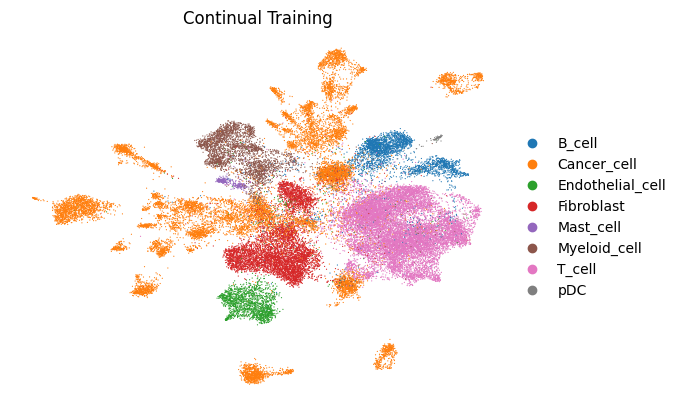

In [31]:
sc.pl.umap(adata_scvi, color='label', show=True, title=title, frameon=False)

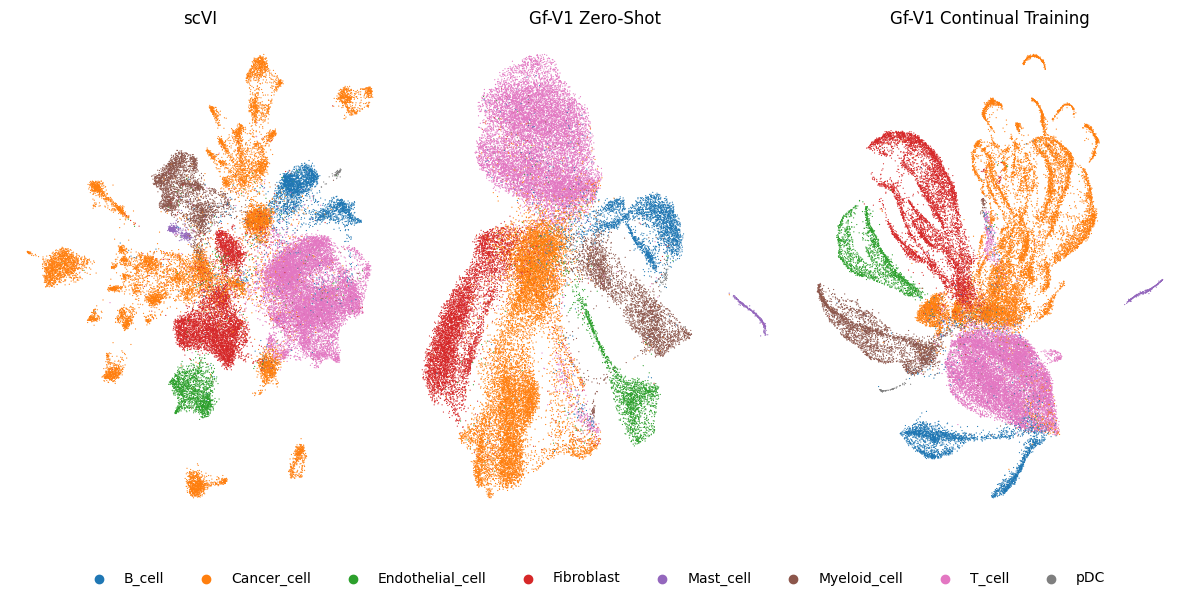

In [32]:
import scanpy as sc
import matplotlib.pyplot as plt

# Compute t-SNE for both datasets
datasets = [adata_scvi, adata_v1, adata_v1_continue]

use_rep = ['X_scVI', 'X_geneformer', 'X_geneformer'] 
for i, ad in enumerate(datasets):
    sc.pp.neighbors(ad,n_neighbors=25, use_rep=use_rep[i])
    sc.tl.umap(ad)

# Create the side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
plt.savefig('umap.png', dpi=100)
plt.show()

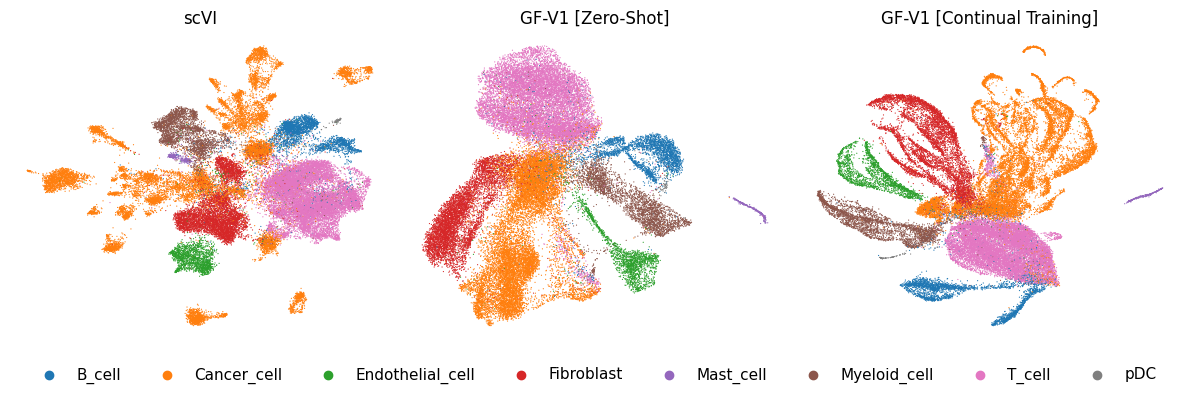

In [39]:
# Create the side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ['scVI', 'GF-V1 [Zero-Shot]', 'GF-V1 [Continual Training]']
for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False, fontsize=11)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
# plt.subplots_adjust(right=0.9)
plt.savefig('umap.png', dpi=100)
plt.show()

## Dotplot

In [ ]:
B cell, Cancer cells, ENdothelial cells, Fibroblast, Mast Cell, Myeloid Cell, T cells, pDC

In [40]:
adata_v1_continue

AnnData object with n_obs × n_vars = 41101 × 3097
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id', 'donor_id', 'timepoint', 'outcome', 'Cancer_type', 'cell_types', 'cohort', 'pre_post', 'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types', 'donor_id_cell_types_pre_post', 'sample_id_pre_post_outcome', 'enough_cells', 'Study_name', 'Primary_or_met', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes_by_counts', 'total_counts', 'n_genes', 'label', 'batch', 'n_counts', 'adata_order'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'ensembl_id'
    uns: 'X_name', 'hvg', 'log1p', 'label_colors', 'neighbors', 'umap', 'tsne'
    obsm: 'PCA', 'UMAP', 'X_geneformer', 'X_geneformer_pca', 'X_umap', 'X_tsne'
    layers: 'counts', 'logcounts', 'scaledata'
    obsp: 'distances', 'connectivities'

In [43]:
embedding_key ='X_geneformer'


In [44]:
sc.pp.neighbors(
adata_v1_continue,
use_rep=embedding_key,
n_neighbors=15,
metric="euclidean", 
random_state=0
)

sc.tl.louvain(
    adata_v1_continue,
    key_added="cluster",
    random_state=0,
    resolution=0.3
)

In [52]:
len(adata_v1_continue.var_names)

3097

In [50]:
'CD79A' in list(adata_v1_continue.var_names)

True

Missing markers: []


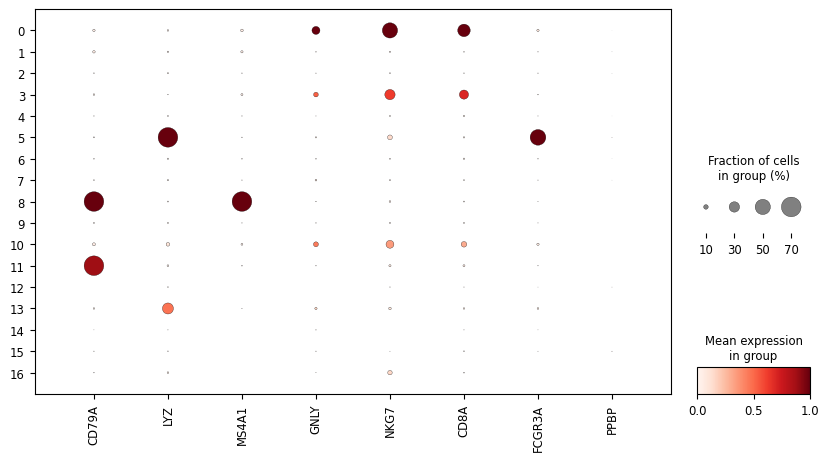

In [54]:
import scanpy as sc
import matplotlib.pyplot as plt

# Replace with your list of canonical marker genes
marker_genes = [
    # 'CD3D',   # T cells
    'CD79A',  # B cells
    'LYZ',    # Myeloid cells
    'MS4A1',  # B cells
    'GNLY',   # NK cells
    'NKG7',   # NK cells
    'CD8A',   # CD8+ T cells
    # 'CD4',    # CD4+ T cells
    'FCGR3A', # Monocytes
    'PPBP'    # Platelets
]

available_markers = [gene for gene in marker_genes if gene in adata_v1_continue.var_names]
missing_markers = [gene for gene in marker_genes if gene not in adata_v1_continue.var_names]

print("Missing markers:", missing_markers)


# Ensure your clusters are assigned
cluster_key = 'cluster'  # Make sure this matches your clustering column name

# Make sure data is log-normalized (common for plotting)
# If not already done:
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)

# Generate dot plot
sc.pl.dotplot(
    adata_v1_continue,
    # var_names=marker_genes,
    groupby=cluster_key,
    standard_scale='var',  # Normalize gene expression for better comparison
    dot_max=0.7,            # Adjust dot size
    color_map='Reds',       # Adjust color map for expression levels
    figsize=(10, 5),
    dendrogram=False,
    var_names=available_markers,
)
plt.show()

Missing marker genes (not in data): ['PDPN', 'KRT18', 'CD3D', 'CD2', 'CD3E']


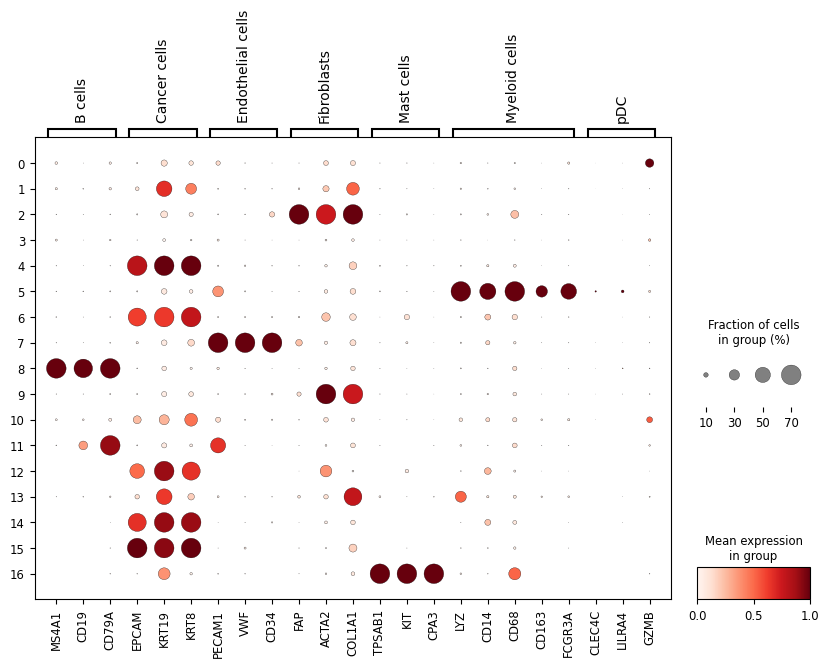

In [64]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = adata_v1_continue

# Define canonical marker genes for selected TME cell types
marker_dict = {
    "B cells": ['MS4A1', 'CD19', 'CD79A'],
    "Cancer cells": ['EPCAM', 'KRT19', 'KRT8', 'KRT18'],
    "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
    "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
    "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
    "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
    "T cells": ['CD3D', 'CD3E', 'CD2'],
    "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
}
# marker_dict = {
#     "B cells": ['MS4A1', 'CD19', 'CD79A'],
#     "Cancer cells": [
#         # Epithelial markers
#         'EPCAM', 'KRT19', 'KRT8', 'KRT18',
#         # Luminal (ER+) subtype
#         'ESR1', 'PGR', 'GATA3', 'FOXA1',
#         # Basal-like/TNBC
#         'KRT5', 'KRT14', 'EGFR',
#         # HER2+ subtype
#         'ERBB2', 'GRB7',
#         # Proliferation
#         'MKI67', 'AURKA', 'BIRC5',
#         # EMT/stemness
#         'VIM', 'ZEB1', 'CD44', 'ALDH1A1'
#     ],
#     "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
#     "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
#     "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
#     "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
#     "T cells": ['CD3D', 'CD3E', 'CD2'],
#     "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
# }

# Flatten and check which markers are present
all_markers = set(gene for genes in marker_dict.values() for gene in genes)
present_markers = [gene for gene in all_markers if gene in adata.var_names]
missing_markers = [gene for gene in all_markers if gene not in adata.var_names]

print("Missing marker genes (not in data):", missing_markers)

# Reconstruct marker dict using only available genes
filtered_marker_dict = {
    cell_type: [gene for gene in genes if gene in present_markers]
    for cell_type, genes in marker_dict.items()
    if any(gene in present_markers for gene in genes)
}

# Optionally standardize gene expression first
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Dotplot using Scanpy
fig = sc.pl.dotplot(
    adata,
    var_names=filtered_marker_dict,
    groupby='cluster',  # Make sure this matches your clustering column
    standard_scale='var',
    dot_max=0.7,
    color_map='Reds',
    figsize=(10, 6),
    dendrogram=False,
    return_fig=True  # Get the matplotlib figure
)
fig.savefig('dotplot.png', dpi=100)
plt.show()

Missing marker genes (not in data): ['CD34', 'EPCAM', 'CD163', 'FAP', 'PDPN', 'KRT8', 'KRT18', 'CD3D', 'CD2', 'CD3E']


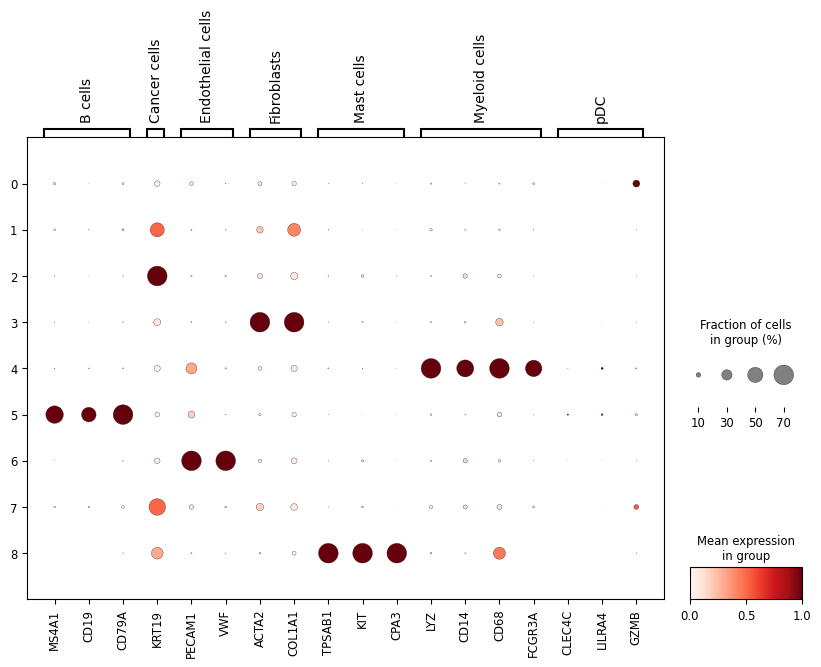

In [67]:
adata = adata_v1.copy()
sc.pp.neighbors(
adata,
use_rep=embedding_key,
n_neighbors=15,
metric="euclidean", 
random_state=0
)

sc.tl.louvain(
    adata,
    key_added="cluster",
    random_state=0,
    resolution=0.3
)


# Define canonical marker genes for selected TME cell types
marker_dict = {
    "B cells": ['MS4A1', 'CD19', 'CD79A'],
    "Cancer cells": ['EPCAM', 'KRT19', 'KRT8', 'KRT18'],
    "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
    "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
    "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
    "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
    "T cells": ['CD3D', 'CD3E', 'CD2'],
    "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
}
# marker_dict = {
#     "B cells": ['MS4A1', 'CD19', 'CD79A'],
#     "Cancer cells": [
#         # Epithelial markers
#         'EPCAM', 'KRT19', 'KRT8', 'KRT18',
#         # Luminal (ER+) subtype
#         'ESR1', 'PGR', 'GATA3', 'FOXA1',
#         # Basal-like/TNBC
#         'KRT5', 'KRT14', 'EGFR',
#         # HER2+ subtype
#         'ERBB2', 'GRB7',
#         # Proliferation
#         'MKI67', 'AURKA', 'BIRC5',
#         # EMT/stemness
#         'VIM', 'ZEB1', 'CD44', 'ALDH1A1'
#     ],
#     "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
#     "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
#     "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
#     "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
#     "T cells": ['CD3D', 'CD3E', 'CD2'],
#     "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
# }

# Flatten and check which markers are present
all_markers = set(gene for genes in marker_dict.values() for gene in genes)
present_markers = [gene for gene in all_markers if gene in adata.var_names]
missing_markers = [gene for gene in all_markers if gene not in adata.var_names]

print("Missing marker genes (not in data):", missing_markers)

# Reconstruct marker dict using only available genes
filtered_marker_dict = {
    cell_type: [gene for gene in genes if gene in present_markers]
    for cell_type, genes in marker_dict.items()
    if any(gene in present_markers for gene in genes)
}

# Optionally standardize gene expression first
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)

# Dotplot using Scanpy
fig = sc.pl.dotplot(
    adata,
    var_names=filtered_marker_dict,
    groupby='cluster',  # Make sure this matches your clustering column
    standard_scale='var',
    dot_max=0.7,
    color_map='Reds',
    figsize=(10, 6),
    dendrogram=False,
    return_fig=True  # Get the matplotlib figure
)
fig.savefig('dotplot_gf1.png', dpi=100)
plt.show()

## Try things

In [69]:
import anndata as ad

In [70]:
fname = '/home/jupyter/__output/brca_full/cell_type/gf-6L-30M-i2048/data.h5ad'
adata_v1 =ad.read_h5ad(fname)

In [71]:
# fname = '/home/jupyter/__output/brca_full/cell_type/Geneformer-V2-104M_continue/data.h5ad'
fname = '/home/jupyter/__output/brca_full/cell_type/gf-6L-30M-i2048_continue/data.h5ad'

adata_v1_continue =ad.read_h5ad(fname)

In [72]:

fname = '/home/jupyter/__output/brca_full/cell_type/scvi/data.h5ad'
adata_scvi =ad.read_h5ad(fname)

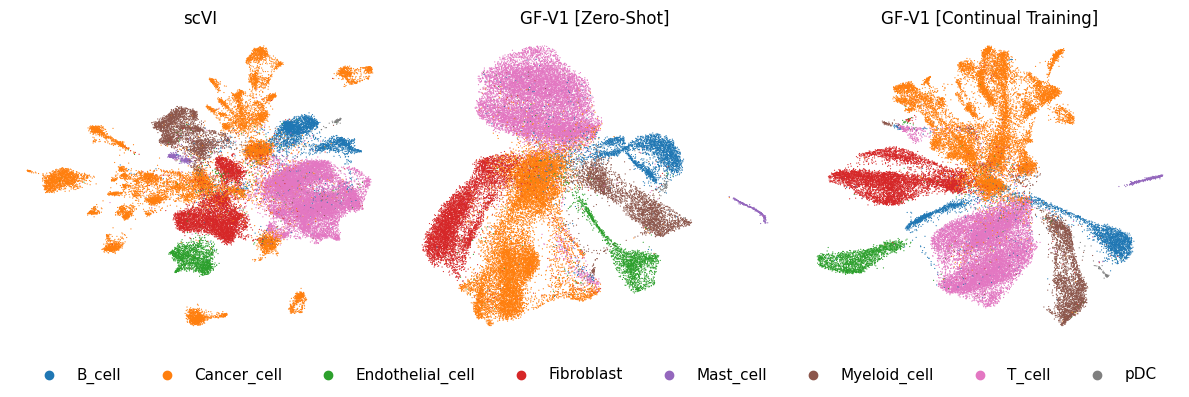

In [73]:
import scanpy as sc
import matplotlib.pyplot as plt

# Compute t-SNE for both datasets
datasets = [adata_scvi, adata_v1, adata_v1_continue]

use_rep = ['X_scVI', 'X_geneformer', 'X_geneformer'] 
for i, ad in enumerate(datasets):
    sc.pp.neighbors(ad,n_neighbors=25, use_rep=use_rep[i])
    sc.tl.umap(ad)

# Create the side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ['scVI', 'GF-V1 [Zero-Shot]', 'GF-V1 [Continual Training]']
for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False, fontsize=11)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
# plt.subplots_adjust(right=0.9)
# plt.savefig('umap.png', dpi=100)
plt.show()

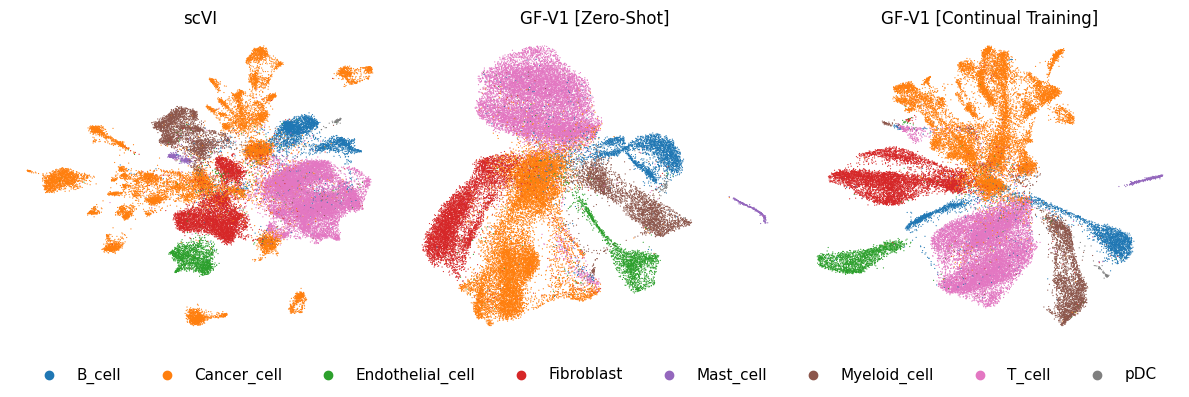

In [76]:
# Create the side-by-side plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ['scVI', 'GF-V1 [Zero-Shot]', 'GF-V1 [Continual Training]']
for ax, ad, title in zip(axes, datasets, titles):
    sc.pl.umap(ad, color='label', ax=ax, show=False, title=title, frameon=False)

# Hide individual legends from scanpy plots
for ax in axes:
    ax.get_legend().remove()  # Remove default scanpy legend
    ax.spines[:].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a single, shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(set(labels)), frameon=False, fontsize=11)

# Final layout adjustments
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leaves space at bottom for the legend
# plt.subplots_adjust(right=0.9)
plt.savefig('umap.png', dpi=100)
plt.show()

Missing marker genes (not in data): ['CD34', 'EPCAM', 'CD163', 'FAP', 'PDPN', 'KRT8', 'KRT18', 'CD3D', 'CD2', 'CD3E']


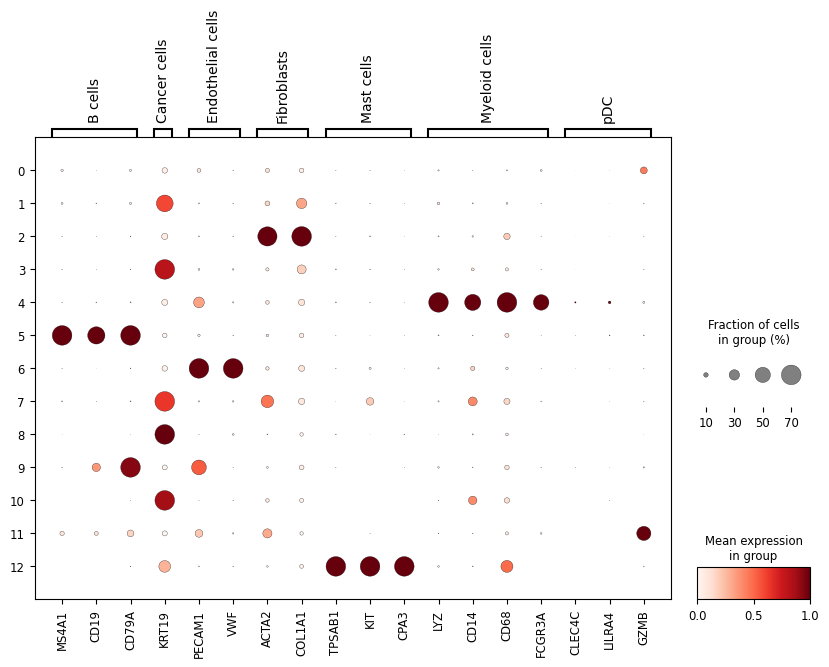

In [75]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = adata_v1_continue.copy()

sc.pp.neighbors(
adata,
use_rep=embedding_key,
n_neighbors=15,
metric="euclidean", 
random_state=0
)

sc.tl.louvain(
    adata,
    key_added="cluster",
    random_state=0,
    resolution=0.3
)

# Define canonical marker genes for selected TME cell types
marker_dict = {
    "B cells": ['MS4A1', 'CD19', 'CD79A'],
    "Cancer cells": ['EPCAM', 'KRT19', 'KRT8', 'KRT18'],
    "Endothelial cells": ['PECAM1', 'VWF', 'CD34'],
    "Fibroblasts": ['FAP', 'PDPN', 'ACTA2', 'COL1A1'],
    "Mast cells": ['TPSAB1', 'KIT', 'CPA3'],
    "Myeloid cells": ['LYZ', 'CD14', 'CD68', 'CD163', 'FCGR3A'],
    "T cells": ['CD3D', 'CD3E', 'CD2'],
    "pDC": ['CLEC4C', 'LILRA4', 'GZMB']
}

# Flatten and check which markers are present
all_markers = set(gene for genes in marker_dict.values() for gene in genes)
present_markers = [gene for gene in all_markers if gene in adata.var_names]
missing_markers = [gene for gene in all_markers if gene not in adata.var_names]

print("Missing marker genes (not in data):", missing_markers)

# Reconstruct marker dict using only available genes
filtered_marker_dict = {
    cell_type: [gene for gene in genes if gene in present_markers]
    for cell_type, genes in marker_dict.items()
    if any(gene in present_markers for gene in genes)
}

# Optionally standardize gene expression first
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Dotplot using Scanpy
fig = sc.pl.dotplot(
    adata,
    var_names=filtered_marker_dict,
    groupby='cluster',  # Make sure this matches your clustering column
    standard_scale='var',
    dot_max=0.7,
    color_map='Reds',
    figsize=(10, 6),
    dendrogram=False,
    return_fig=True  # Get the matplotlib figure
)
fig.savefig('dotplot.png', dpi=100)
plt.show()